## M5 Dataset EDA


## Credits

For full EDA, refer to

https://www.kaggle.com/code/anirbansen3027/m5-forecasting-exhaustive-eda-beginner

# For those who want to setup the environment using conda

conda env create --file project2_environment.yml

conda activate project2

python3 -m ipykernel install --user --name project2 --display-name project2

### Load Libraries

In [1]:
##########################Load Libraries  ####################################
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
INPUT_DIR_PATH = './data/'

In [3]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df


def read_data():
    sell_prices_df = pd.read_csv(INPUT_DIR_PATH + 'sell_prices.csv')
    sell_prices_df = reduce_mem_usage(sell_prices_df)
    print('Sell prices has {} rows and {} columns'.format(sell_prices_df.shape[0], sell_prices_df.shape[1]))

    calendar_df = pd.read_csv(INPUT_DIR_PATH + 'calendar.csv')
    calendar_df = reduce_mem_usage(calendar_df)
    print('Calendar has {} rows and {} columns'.format(calendar_df.shape[0], calendar_df.shape[1]))

    sales_train_validation_df = pd.read_csv(INPUT_DIR_PATH + 'sales_train_validation.csv')
    print('Sales train validation has {} rows and {} columns'.format(sales_train_validation_df.shape[0], sales_train_validation_df.shape[1]))

    submission_df = pd.read_csv(INPUT_DIR_PATH + 'sample_submission.csv')
    return sell_prices_df, calendar_df, sales_train_validation_df, submission_df

# Load Data <a id="2"></a>

In [4]:
sell_prices_df,  calendar_df, sales_train_validation_df, _ = read_data()

Mem. usage decreased to 130.48 Mb (37.5% reduction)
Sell prices has 6841121 rows and 4 columns
Mem. usage decreased to  0.12 Mb (41.9% reduction)
Calendar has 1969 rows and 14 columns
Sales train validation has 30490 rows and 1919 columns


# 1. Explore sales_train_validation.csv

In [5]:
print("The sales data has '{}' rows and '{}' columns".format(sales_train_validation_df.shape[0], sales_train_validation_df.shape[1]))

#Let's have a look at the data
sales_train_validation_df.head()

The sales data has '30490' rows and '1919' columns


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [6]:
#Let's look at the unique states in the sales dataset
sales_train_validation_df.state_id.unique()

array(['CA', 'TX', 'WI'], dtype=object)

In [7]:
#Lets look at the number of rows for each state. Value_counts give you that
sales_train_validation_df.state_id.value_counts()

CA    12196
TX     9147
WI     9147
Name: state_id, dtype: int64

In [8]:
#Let's have a look at the ratio of the number of rows. Normalize = True gives you the ratio
sales_train_validation_df.state_id.value_counts(normalize =True) 

CA    0.4
TX    0.3
WI    0.3
Name: state_id, dtype: float64

In [9]:
# Assuming your DataFrame is called 'df'
date_col = [col for col in sales_train_validation_df.columns if col.startswith('d_')]

#Calcuating total sales for each row/ id by adding the sales of each of the 1913 days
sales_train_validation_df['total_sales'] = sales_train_validation_df[date_col].sum(axis=1)
#Adding all the sales for each state
sales_train_validation_df.groupby('state_id').agg({"total_sales":"sum"}).reset_index()

,state_id,total_sales
0,CA,28675547
1,TX,18899006
2,WI,18120856


## Sales Ratio across the 3 states

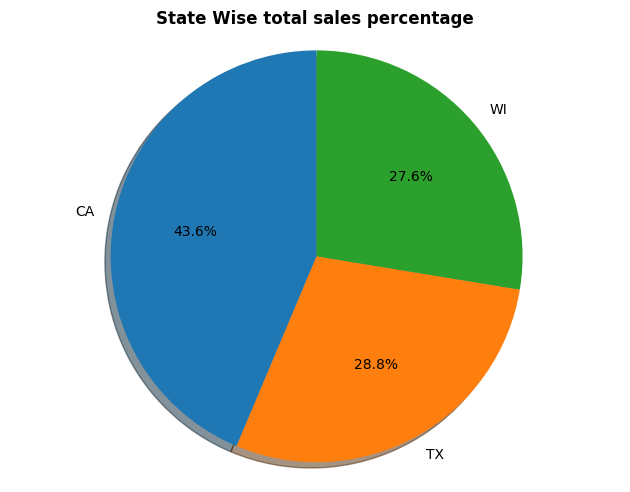

In [10]:
#Calculating the sales ratio
state_wise_sales_data = sales_train_validation_df.groupby('state_id').agg({"total_sales":"sum"})/sales_train_validation_df.total_sales.sum() * 100
state_wise_sales_data = state_wise_sales_data.reset_index()
#Plotting the sales ratio
fig1, ax1 = plt.subplots()
ax1.pie(state_wise_sales_data['total_sales'],labels= state_wise_sales_data['state_id'] , autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("State Wise total sales percentage",fontweight = "bold")
plt.show()

## Sales Ratio across the 10 stores

In [11]:
#Let's have a look at the unique stores
print("Let's have a look at the unique stores - ",sales_train_validation_df.store_id.unique())

Let's have a look at the unique stores -  ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']


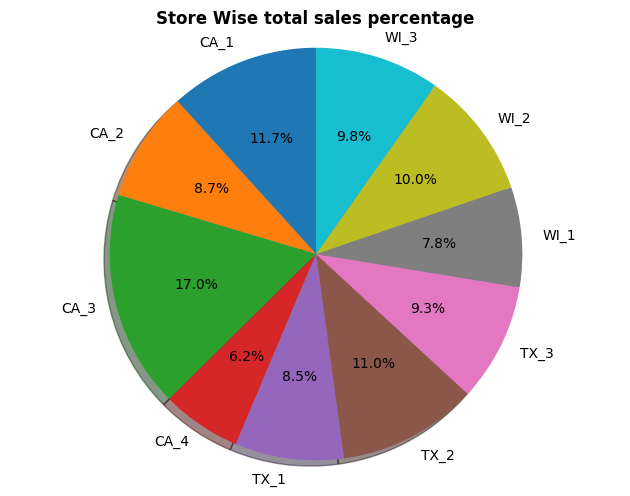

In [12]:
#Caculating the sales ratio for the 10 stores
store_wise_sales_data=sales_train_validation_df.groupby('store_id').agg({"total_sales":"sum"})/sales_train_validation_df.total_sales.sum() * 100
#Plotting the sales ratio for the 10 stores
store_wise_sales_data = store_wise_sales_data.reset_index()
fig1, ax1 = plt.subplots()
ax1.pie(store_wise_sales_data['total_sales'],labels= store_wise_sales_data['store_id'] , autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Store Wise total sales percentage",fontweight = "bold")
plt.show()

## Sales Ratio across the 3 categories

In [13]:
# Let's have a look at the unique categories 
print("Let's have a look at the unique categories -",sales_train_validation_df.cat_id.unique())

Let's have a look at the unique categories - ['HOBBIES' 'HOUSEHOLD' 'FOODS']


In [14]:
#Let's have a look at the total sales from each of the 3 categries
print("Total Sales from each category")
sales_train_validation_df.groupby('cat_id').agg({"total_sales":"sum"}).reset_index()

Total Sales from each category


,cat_id,total_sales
0,FOODS,45089939
1,HOBBIES,6124800
2,HOUSEHOLD,14480670


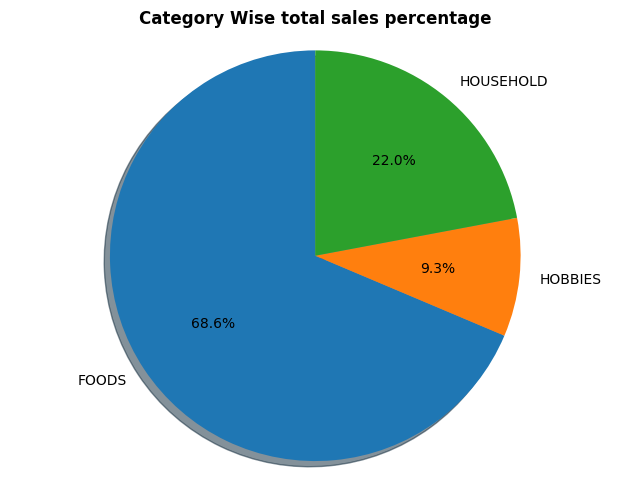

In [15]:
#Caculating the sales ratio for the 3 categories
cat_wise_sales_data = sales_train_validation_df.groupby('cat_id').agg({"total_sales":"sum"})/sales_train_validation_df.total_sales.sum() * 100
cat_wise_sales_data = cat_wise_sales_data.reset_index()
#Plotting the sales ratio for the 3 categories
fig1, ax1 = plt.subplots()
ax1.pie(cat_wise_sales_data['total_sales'],labels= cat_wise_sales_data['cat_id'] , autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Category Wise total sales percentage",fontweight = "bold")
plt.show()

## Sales of each category across the 3 states

Text(0.5, 1.0, 'Sales Distrubution for each category across states')

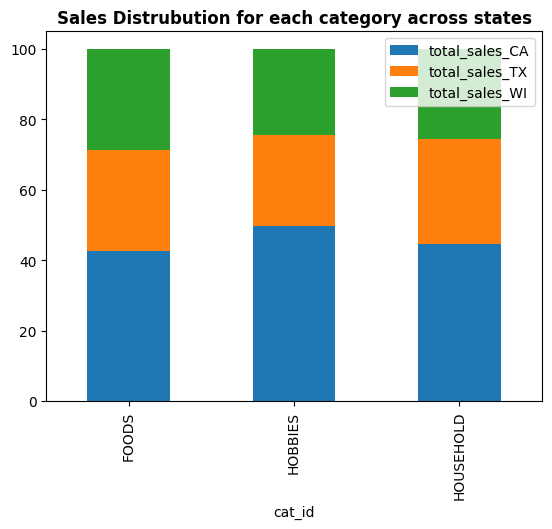

In [16]:
cat_state_sales =sales_train_validation_df.groupby(['cat_id','state_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()
cat_state_sales.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in cat_state_sales.columns]
cat_state_sales.plot(kind='bar', stacked=True)
plt.title("Sales Distrubution for each category across states",fontweight = "bold")

## Sales ditribution for each state across categories

Text(0.5, 1.0, 'Sales Distrubution for each state across categories')

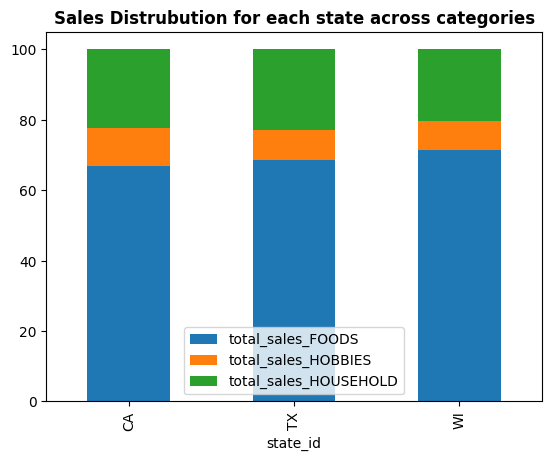

In [17]:
#Calculating sales distribution for each state 
state_cat_sales = sales_train_validation_df.groupby(['state_id','cat_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()
#Plotting the sales distribution for each state
state_cat_sales.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in state_cat_sales.columns]
state_cat_sales.plot(kind='bar', stacked=True)
plt.title("Sales Distrubution for each state across categories",fontweight = "bold")

## Sales ditribution across departments

In [18]:
#Let's look at the unique departments
print("Let's look at the unique departments - ",sales_train_validation_df.dept_id.unique())

Let's look at the unique departments -  ['HOBBIES_1' 'HOBBIES_2' 'HOUSEHOLD_1' 'HOUSEHOLD_2' 'FOODS_1' 'FOODS_2'
 'FOODS_3']


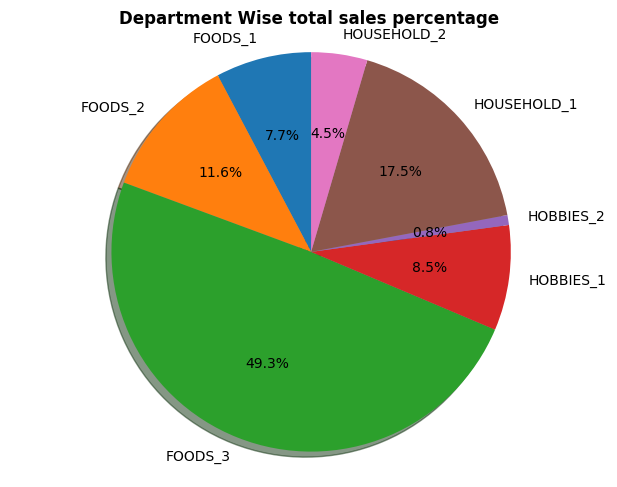

In [19]:
#Calculating sales distribution across departments
dept_sales = sales_train_validation_df.groupby('dept_id').agg({"total_sales":"sum"})/sales_train_validation_df.total_sales.sum() * 100
#Plotting
dept_sales = dept_sales.reset_index()
fig1, ax1 = plt.subplots()
ax1.pie(dept_sales['total_sales'],labels= dept_sales['dept_id'] , autopct='%1.1f%%',
        shadow=True, startangle=90)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Department Wise total sales percentage",fontweight = "bold")
plt.show()

## Sales distribution of stores across departments

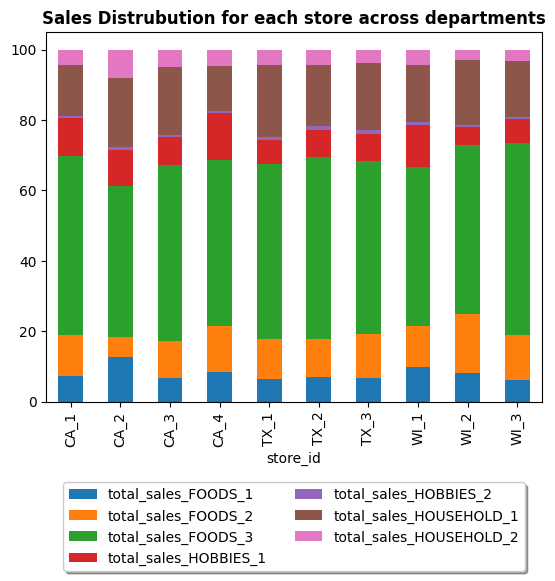

In [20]:
# Calculating the sales distribution of stores
store_dept_sales = sales_train_validation_df.groupby(['store_id','dept_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()
store_dept_sales.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in store_dept_sales.columns]
#Plotting the sales distribution
store_dept_sales.plot(kind='bar', stacked=True)
plt.title("Sales Distrubution for each store across departments",fontweight = "bold")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), shadow=True, ncol=2)

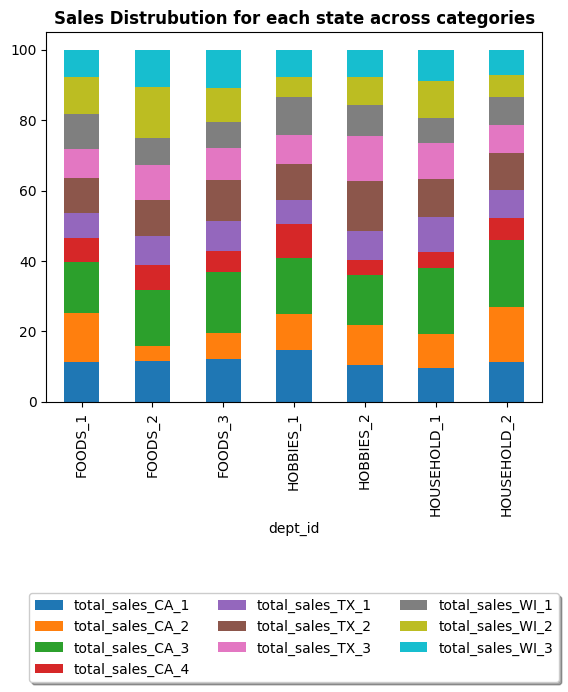

In [21]:
dept_store_sales = sales_train_validation_df.groupby(['dept_id','store_id']).agg({"total_sales":"sum"}).groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()
dept_store_sales.columns = [f'{i}_{j}' if j != '' else f'{i}' for i,j in dept_store_sales.columns]
dept_store_sales.plot(kind='bar', stacked=True)
plt.title("Sales Distrubution for each state across categories",fontweight = "bold")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3)

# 2. Explore calendar.csv

In [22]:
#Let's look at the calender data
calendar_df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [23]:
print("The calender dataset has {} rows and {} columns".format(calendar_df.shape[0],calendar_df.shape[1]))

The calender dataset has 1969 rows and 14 columns


In [24]:
# Event names for each event type
events1 = calendar_df[['event_type_1','event_name_1',]]
events2 = calendar_df[['event_type_2','event_name_2',]]
events2.columns = ["event_type_1","event_name_1"]
events = pd.concat([events1,events2],ignore_index = True)
events = events.dropna().drop_duplicates()
events
events_dict = {k: g["event_name_1"].tolist() for k,g in events.groupby("event_type_1")}
print("Event Names across different Event Types")
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in events_dict.items()]))

Event Names across different Event Types


,Cultural,National,Religious,Sporting
0,ValentinesDay,PresidentsDay,LentStart,SuperBowl
1,StPatricksDay,MemorialDay,LentWeek2,NBAFinalsStart
2,Cinco De Mayo,IndependenceDay,Purim End,NBAFinalsEnd
3,Mother's day,LaborDay,OrthodoxEaster,NaN
4,Father's day,ColumbusDay,Pesach End,NaN
5,Halloween,VeteransDay,Ramadan starts,NaN
6,Easter,Thanksgiving,Eid al-Fitr,NaN
7,NaN,Christmas,EidAlAdha,NaN
8,NaN,NewYear,Chanukah End,NaN
9,NaN,MartinLutherKingDay,OrthodoxChristmas,NaN


## What we see:

The calender data is given for all the 1913 days in the sales data (actually we have 1969 days).

We have at max 2 events in a day for which the event names and the event types are given.

We also have SNAP days flags for each state separately i.e. all states have different SNAP days.

## What is SNAP?

SNAP stands for the Supplemental Nutrition Assistance Program. SNAP is a federal program that helps millions of low-income Americans put food on the table. Across the United States there are 9.5 million families with children on SNAP. It is the largest program working to fight hunger in America.

What kinds of groceries can be purchased with SNAP?

Households can use SNAP to buy nutritious foods such as breads and cereals, fruits and vegetables, meat and fish and dairy products. SNAP benefits cannot be used to buy any kind of alcohol or tobacco products or any nonfood items like household supplies and vitamins and medicines. N.B. So we can expect SNAP can help sales in food items.

In [25]:
snap_days = calendar_df.groupby(['year','month'])['snap_CA','snap_TX','snap_WI'].sum().reset_index()
print("SNAP days for each month across the years for all the states")
snap_days.pivot(index="month",columns = "year",values = ["snap_CA","snap_TX","snap_WI"])

SNAP days for each month across the years for all the states


/home/juheonyi/.conda/envs/project2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


snap_CA                               snap_TX                          \
year     2011  2012  2013  2014  2015  2016    2011  2012  2013  2014  2015   
month                                                                         
1         0.0  10.0  10.0  10.0  10.0  10.0     0.0  10.0  10.0  10.0  10.0   
2        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
3        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
4        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
5        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
6        10.0  10.0  10.0  10.0  10.0  10.0    10.0  10.0  10.0  10.0  10.0   
7        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
8        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
9        10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
10       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
11       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   
12       10.0  10.0  10.0  10.0  10.0   NaN    10.0  10.0  10.0  10.0  10.0   

            snap_WI                                
year   2016    2011  2012  2013  2014  2015  2016  
month                                              
1      10.0     0.0  10.0  10.0  10.0  10.0  10.0  
2      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
3      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
4      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
5      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
6      10.0    10.0  10.0  10.0  10.0  10.0  10.0  
7       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
8       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
9       NaN    10.0  10.0  10.0  10.0  10.0   NaN  
10      NaN    10.0  10.0  10.0  10.0  10.0   NaN  
11      NaN    10.0  10.0  10.0  10.0  10.0   NaN  
12      NaN    10.0  10.0  10.0  10.0  10.0   NaN

# 3. Time series views

## Daily overall sales

<AxesSubplot:title={'center':'Daily Overall Sales'}, xlabel='datum'>

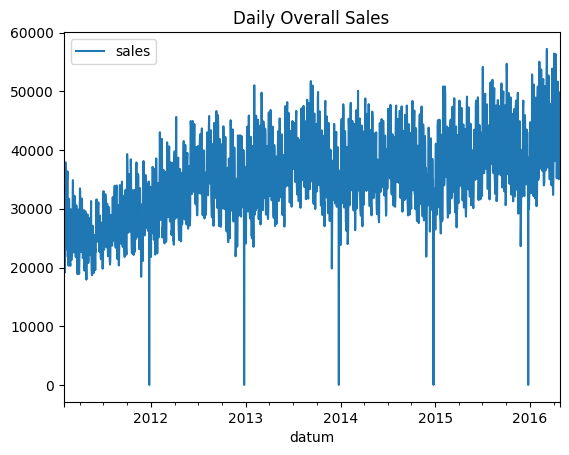

In [26]:
import datetime

#Setting the start date
base = datetime.datetime(2011,1,29)
#Calculating the total sales in a day
sales_sum = pd.DataFrame(sales_train_validation_df[date_col].sum(axis =0),columns = ["sales"])
#Adding the date column
sales_sum['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]
sales_sum.set_index('datum', drop=True, inplace=True)
sales_sum.sort_index(inplace=True)

#Plotting daily states
sales_sum.plot(title = "Daily Overall Sales")

## Monthly overall sales across states

<AxesSubplot:title={'center':'Monthly Sales accross States'}, xlabel='datum'>

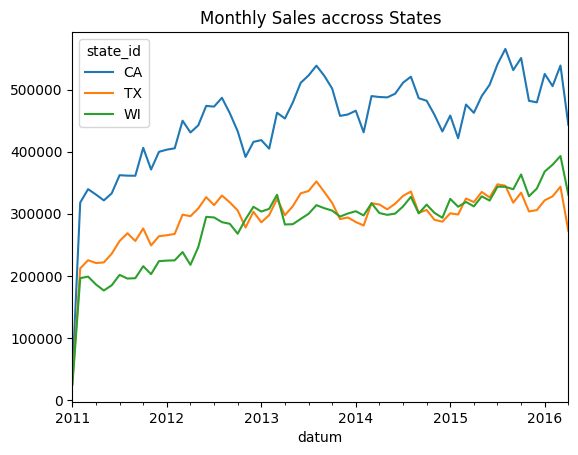

In [27]:
state_level = sales_train_validation_df.groupby("state_id")[date_col].sum().reset_index().set_index('state_id').T
state_level['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]
state_level.set_index('datum', drop=True, inplace=True)
state_level.sort_index(inplace=True)
state_level.head()
state_month_level = state_level.groupby(pd.Grouper(freq='1M')).sum()
state_month_level.plot(title = "Monthly Sales accross States")

### What we see:

CA sales has always been the highest. The peaks in August are the most evident at CA in comparison to other states. 

Seasonality impacts CA sales the most.

WI have shown the highest increase in sales over the years. The sales were lower than TX before 2013. TX and WI sales were similar in 2013 to 2015 August. 

It has shown higher sales after 2015 August than TX. It will be interesting to look at what has caused WI to increase significantly over the years.

## Average sales across months for different categories

<AxesSubplot:title={'center':'Avg. Sales across months'}, xlabel='datum'>

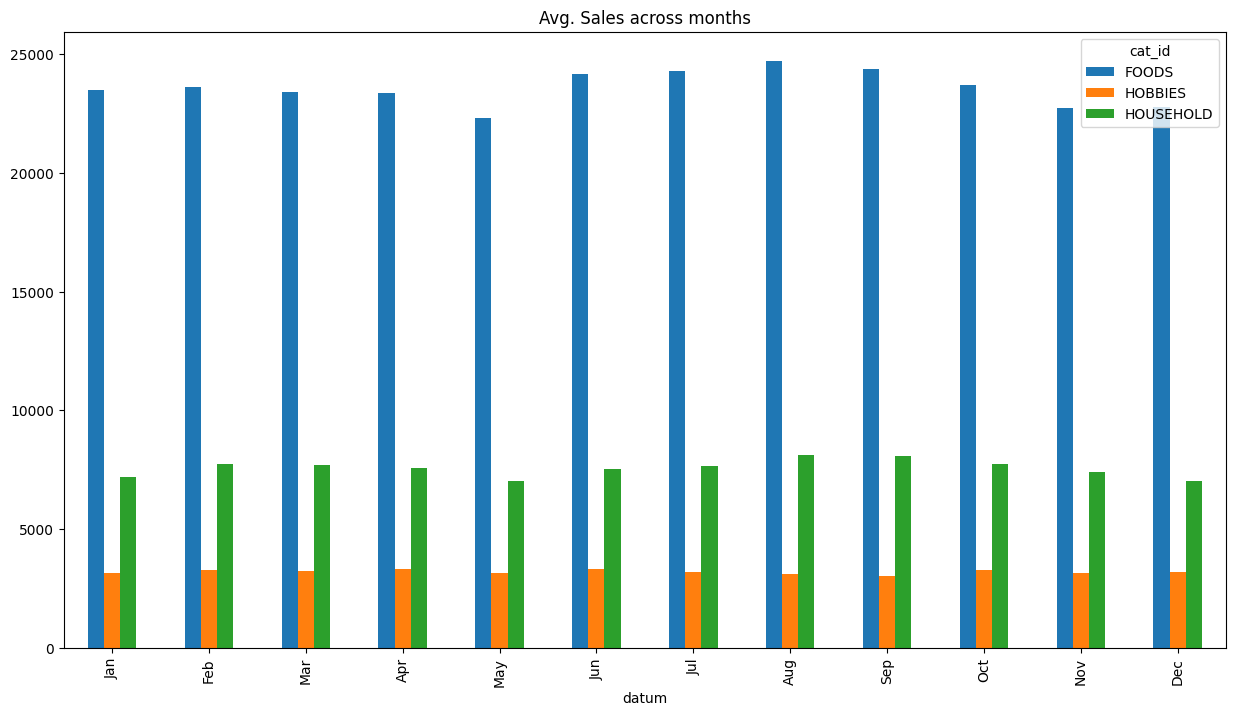

In [28]:
cat_level = sales_train_validation_df.groupby("cat_id")[date_col].sum().reset_index().set_index('cat_id').T
cat_level['datum'] = [base + datetime.timedelta(days=x) for x in range(1913)]
cat_level.set_index('datum', drop=True, inplace=True)
cat_level.sort_index(inplace=True)
cat_level.head()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec'] 
monthly_sales = cat_level.groupby(cat_level.index.strftime('%b')).mean().reindex(months)
monthly_sales.plot( kind="bar",title = "Avg. Sales across months", figsize = (15,8))

## Average sales on day of month across different categories

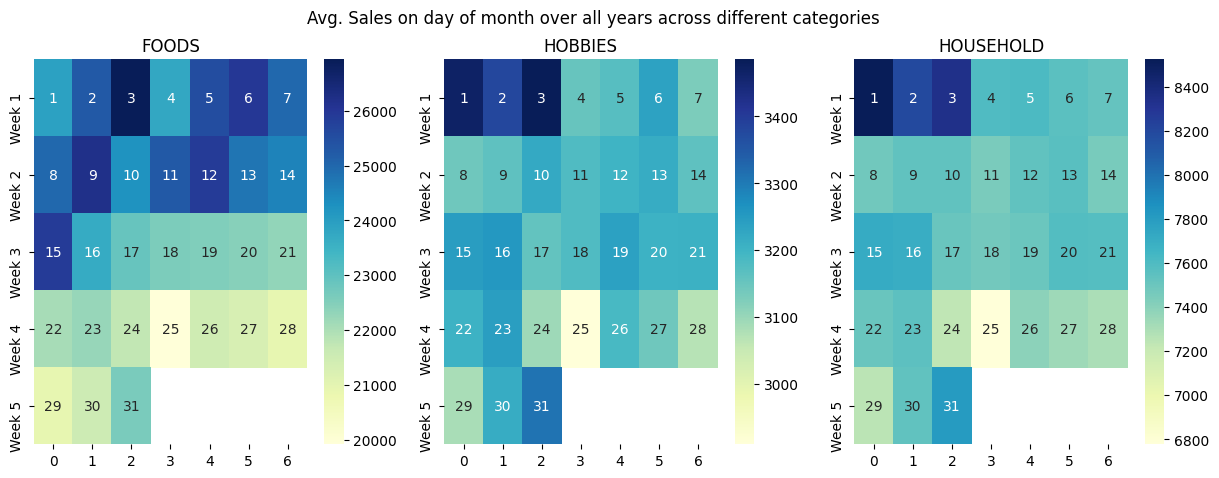

In [29]:
cat_monthly_sales = cat_level.groupby(cat_level.index.strftime('%d')).mean()
foods_list = np.array(cat_monthly_sales['FOODS'].tolist())
foods_list = np.append(foods_list, np.repeat(np.nan, 4)).reshape(5,7)
hobbies_list = np.array(cat_monthly_sales['HOBBIES'].tolist())
hobbies_list = np.append(hobbies_list, np.repeat(np.nan, 4)).reshape(5,7)
household_list = np.array(cat_monthly_sales['HOUSEHOLD'].tolist())
household_list = np.append(household_list, np.repeat(np.nan, 4)).reshape(5,7)
labels = range(1,32)
labels = np.append(labels, np.repeat(np.nan, 4)).reshape(5,7)


fig, (ax1, ax2 , ax3) = plt.subplots(1,3, figsize = (15,5))
foods_map= sns.heatmap(foods_list,cmap = "YlGnBu",annot = labels, yticklabels = ("Week 1","Week 2","Week 3","Week 4","Week 5"), ax =ax1)
hobbies_map= sns.heatmap(hobbies_list,cmap = "YlGnBu",annot = labels, yticklabels = ("Week 1","Week 2","Week 3","Week 4","Week 5"), ax =ax2)
household_map= sns.heatmap(household_list,cmap = "YlGnBu",annot = labels, yticklabels = ("Week 1","Week 2","Week 3","Week 4","Week 5"), ax =ax3)
ax1.set_title('FOODS')
ax2.set_title('HOBBIES')
ax3.set_title('HOUSEHOLD')
plt.suptitle("Avg. Sales on day of month over all years across different categories ")
plt.show()